# [실습] 붓꽃 다중분류

붓꽃은 세포핵을 둘러싼 꽃받침(sepal)과 꽃잎(petal)으로 구성되어 있으며, 이러한 특징을 기반으로 붓꽃의 품종을 식별할 수 있습니다.

- Setosa (세토사): Setosa는 붓꽃 중에서 가장 작은 꽃잎과 꽃받침을 가지고 있습니다.
꽃잎과 꽃받침이 비교적 짧고 뾰족한 모습을 갖고 있으며, 주로 흰색 또는 연한 분홍색을 띠고 있습니다.

- Versicolor (버시컬러): Versicolor는 Setosa보다 크고 긴 꽃잎과 꽃받침을 가지고 있습니다.
꽃잎의 색은 보통 연한 보라색이며, 중간 크기의 붓꽃입니다.

- Virginica (버지니카): Virginica는 붓꽃 중에서 가장 크고 긴 꽃잎과 꽃받침을 가지고 있습니다.
꽃잎의 색은 주로 짙은 보라색이며, 다른 품종들에 비해 상대적으로 더 큰 크기를 갖고 있습니다.

![](https://d.pr/i/4egoon+)

In [ ]:
# classification_iris

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
iris_data = load_iris()
iris_data # dictionary 형태

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
iris_data.keys() # 데이터 키 확인

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris_data.target # 숫자로 인코딩된 label 데이터

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris_data.target_names # label 이름

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris_data.feature_names # 특성 이름

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
print(iris_data.data) # input data (feature data) 특성데이터

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

##### 최근접이웃 분류 모델로 훈련/평가 해보기기

In [ ]:
# 데이터 전처리
# 1. 입력-라벨 데이터 분리
# 2. 훈련-테스트 데이터 분리
# 3. 정규화

#훈련

#평가가

In [13]:
# 데이터 전처리
iris_data['data'].shape , iris_data['target'].shape

# # 훈련/테스트 데이터 분리
# train_input, test_input, train_label, test_label= train_test_split(iris_data['data'], iris_data['target'], test_size=.10, random_state=0)



((150, 4), (150,))

In [14]:
import pandas as pd

In [17]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [46]:
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
iris_df['label'] = iris_data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [22]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [26]:
iris_df.groupby('label').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
label,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [32]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [33]:
# 입력-라벨 데이터 분리
iris_input = np.array(iris_df.drop('label', axis=1))
iris_label = np.array(iris_df['label'])


In [47]:
iris_input

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [48]:
iris_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [49]:
from sklearn.model_selection import train_test_split

In [34]:
# 훈련-테스트 데이터 분리
train_input, test_input, train_label, test_label = train_test_split(iris_input, iris_label, test_size=.10, random_state=42)

In [ ]:
# 훈련-테스트 데이터 분리(이미 분리된 데이터 사용하기)
train_input, test_input, train_label, test_label = train_test_split(iris_data.data, iris_data.target, test_size=.25, random_state=42)

In [35]:
train_input.shape, test_input.shape, train_label.shape, test_label.shape

((135, 4), (15, 4), (135,), (15,))

In [50]:
from sklearn.preprocessing import StandardScaler

In [36]:
# 정규화
standard_scaler = StandardScaler()
standard_scaler.fit(train_input) # 훈련데이터를 기준 평균/표준편차 작업

train_scaled = standard_scaler.transform(train_input) # 훈련데이터 정규화 반영
test_scaled = standard_scaler.transform(test_input) # 테스트데이터 정규화 반영

In [37]:
train_scaled

array([[ 0.56195149,  0.55613693,  0.51790028,  0.51008192],
       [ 0.80278784, -0.13265651,  1.14418849,  1.30158834],
       [-0.28097574, -1.28064558,  0.06241795, -0.14950677],
       [-0.16055757, -0.59185214,  0.4040297 ,  0.11432871],
       [ 0.68236966, -0.59185214,  1.03031791,  1.30158834],
       [-1.36473933,  0.32653911, -1.24709376, -1.3367664 ],
       [ 0.32111514, -0.13265651,  0.63177087,  0.77391739],
       [-1.0034848 ,  0.78573474, -1.24709376, -1.07293093],
       [ 0.68236966, -0.59185214,  1.03031791,  1.1696706 ],
       [ 2.4886423 ,  1.70412599,  1.48580024,  1.03775287],
       [ 1.04362419, -0.13265651,  0.80257674,  1.43350608],
       [ 1.04362419, -1.28064558,  1.14418849,  0.77391739],
       [ 1.16404237,  0.32653911,  1.20112378,  1.43350608],
       [-1.24432115, -0.13265651, -1.36096434, -1.20484867],
       [-1.24432115,  0.0969413 , -1.24709376, -1.3367664 ],
       [-1.4851575 ,  1.24493037, -1.58870551, -1.3367664 ],
       [-0.16055757,  3.

In [38]:
test_scaled

array([[ 0.32111514, -0.59185214,  0.51790028, -0.01758903],
       [-0.16055757,  1.70412599, -1.19015847, -1.20484867],
       [ 2.24780595, -1.05104777,  1.7704767 ,  1.43350608],
       [ 0.20069696, -0.36225433,  0.4040297 ,  0.37816418],
       [ 1.16404237, -0.59185214,  0.57483557,  0.24624644],
       [-0.5218121 ,  0.78573474, -1.30402905, -1.07293093],
       [-0.28097574, -0.36225433, -0.10838793,  0.11432871],
       [ 1.28446054,  0.0969413 ,  0.74564145,  1.43350608],
       [ 0.44153331, -1.96943902,  0.4040297 ,  0.37816418],
       [-0.04013939, -0.82144995,  0.06241795, -0.01758903],
       [ 0.80278784,  0.32653911,  0.74564145,  1.03775287],
       [-1.24432115, -0.13265651, -1.36096434, -1.46868414],
       [-0.40139392,  1.01533255, -1.41789963, -1.3367664 ],
       [-1.12390297,  0.0969413 , -1.30402905, -1.46868414],
       [-0.88306662,  1.70412599, -1.30402905, -1.20484867]])

In [40]:
iris_df.label.value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [ ]:
# 훈련 / 학습

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
# 모델 생성
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_scaled, train_label)


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
# 평가

In [43]:
knn.score(test_scaled, test_label)

1.0

In [52]:
# 평가: accuracy_score

In [54]:
# 평가지표 - 정확도
from sklearn.metrics import accuracy_score
pred = knn.predict(test_scaled)
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0])

In [56]:
accuracy_score(test_label, pred) # 실제 정답과 예측치를 인자로 받는다.

1.0

##### 분류(classification)에서의 평가하는 지표는 정확도(accuracy)를 기반
##### 회귀(regression)에서의 평가하는 지표는 R2 Score를 기반

In [44]:
train_scaled

array([[ 0.56195149,  0.55613693,  0.51790028,  0.51008192],
       [ 0.80278784, -0.13265651,  1.14418849,  1.30158834],
       [-0.28097574, -1.28064558,  0.06241795, -0.14950677],
       [-0.16055757, -0.59185214,  0.4040297 ,  0.11432871],
       [ 0.68236966, -0.59185214,  1.03031791,  1.30158834],
       [-1.36473933,  0.32653911, -1.24709376, -1.3367664 ],
       [ 0.32111514, -0.13265651,  0.63177087,  0.77391739],
       [-1.0034848 ,  0.78573474, -1.24709376, -1.07293093],
       [ 0.68236966, -0.59185214,  1.03031791,  1.1696706 ],
       [ 2.4886423 ,  1.70412599,  1.48580024,  1.03775287],
       [ 1.04362419, -0.13265651,  0.80257674,  1.43350608],
       [ 1.04362419, -1.28064558,  1.14418849,  0.77391739],
       [ 1.16404237,  0.32653911,  1.20112378,  1.43350608],
       [-1.24432115, -0.13265651, -1.36096434, -1.20484867],
       [-1.24432115,  0.0969413 , -1.24709376, -1.3367664 ],
       [-1.4851575 ,  1.24493037, -1.58870551, -1.3367664 ],
       [-0.16055757,  3.

TypeError: legend() takes 0-2 positional arguments but 3 were given

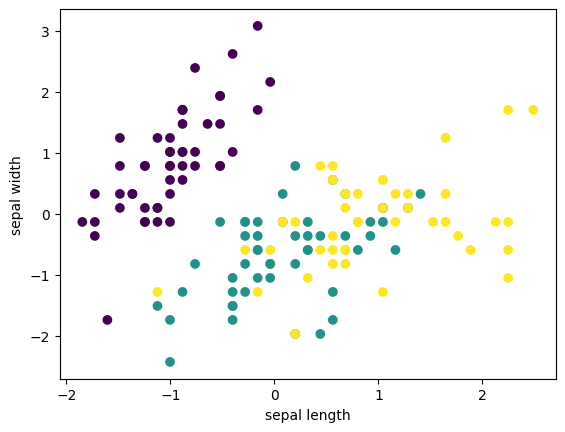

In [57]:
# Scatter plot 로 확인해보기
plt.scatter(train_scaled[:,0], train_scaled[:,1], c=train_label)
plt.scatter(test_scaled[:,0], test_scaled[:,1], c=test_label)

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend('setosa', 'versicolor', 'virginica')
plt.show()



In [ ]:
# 예측
pred = knn.predict(test_scaled)
pred
# 평가
from sklearn.metrics import accuracy_score
accuracy_score(test_label, pred)
